# Importing the Libraries 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

## LOADING THE DATA

In [3]:
data = pd.read_csv('D:\ML\CKD_model-master/chronic_kidney_disease_full.csv') #Importing the dataset available

## BINARY MAPPING OF THE DATA

In [4]:
data = data.replace({
'class': {'ckd':1, 'notckd':0},
'htn': {'yes':1, 'no':0},
'dm': {'yes':1, 'no':0}, 
'cad': {'yes':1, 'no':0},
'appet': {'good':1, 'poor':0},
'ane': {'yes':1, 'no':0},
'pe': {'yes':1, 'no':0},
'ba': {'present':1, 'notpresent':0},
'pcc': {'present':1, 'notpresent':0},
'pc': {'abnormal':1, 'normal':0},
'rbc': {'abnormal':1, 'normal':0}
})

# Dropping unavailable values

In [12]:
data.dropna(inplace=True) # This line is removing the dataset which dont have any values in it.

# Data Splitting for Training 

In [7]:
#This is to split the data to train and evaluate
X_train, X_test, y_train, y_test = train_test_split(
data.drop('class', axis=1),
data['class'],
stratify=data['class'],
shuffle=True 
)

# Traning the Model Using Logistic Regression Method

In [8]:
#This is to train the model using a labeled dataset 
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Predict and evaluate performance

In [9]:
#logistic regression and Naive Bayes models are used to make predictions on the test set
train_pred = logreg.predict(X_train)
test_pred = logreg.predict(X_test)
print('Train Accuracy: ', accuracy_score(y_train, train_pred))
print('Test Accuracy: ', accuracy_score(y_test, test_pred))
tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()
print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

Train Accuracy:  1.0
Test Accuracy:  0.975
True Neg: 29
False Pos: 0
False Neg: 1
True Pos: 10


# Visualize correlations using a heatmap

<AxesSubplot:>

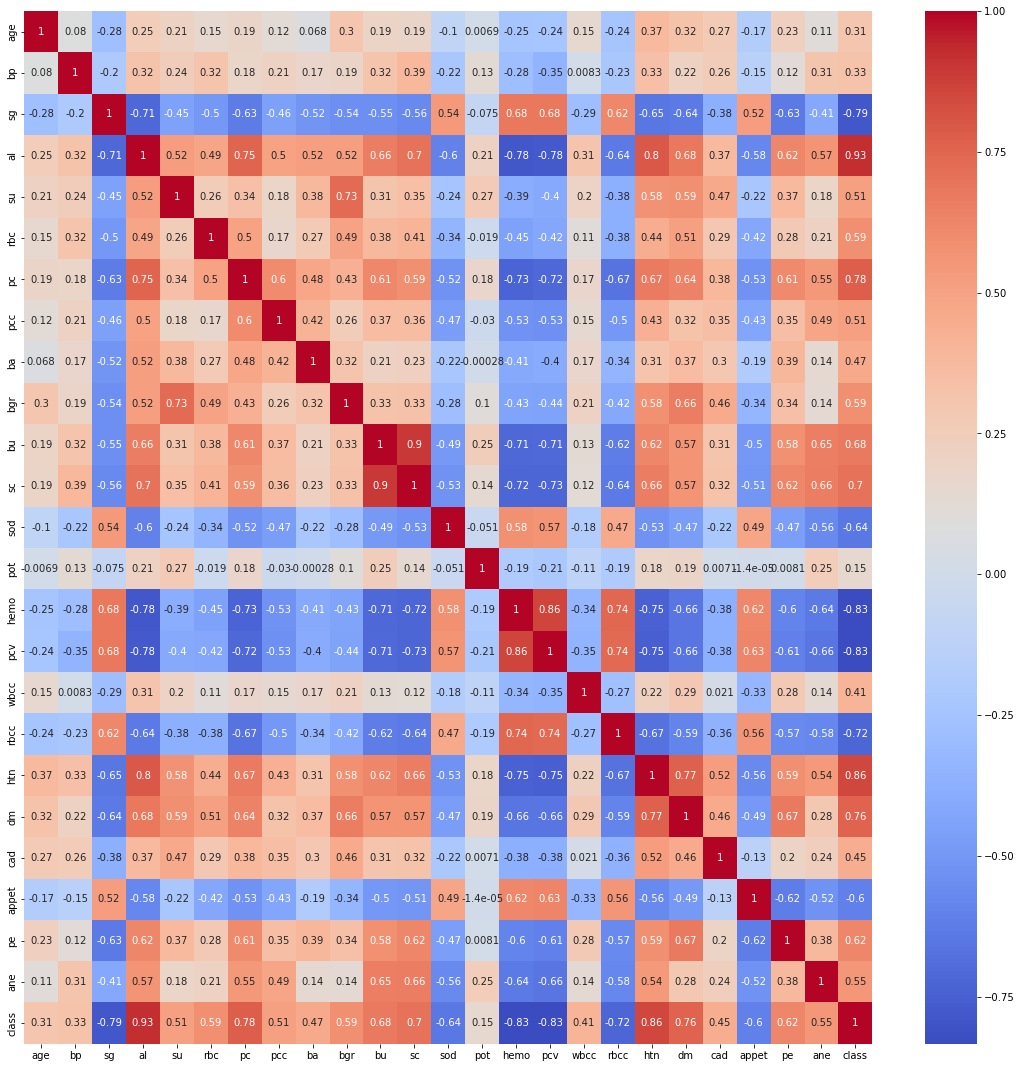

In [10]:
plt.figure(figsize=(19, 19))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

# Load data and preprocess

In [14]:
from sklearn.preprocessing import LabelEncoder

# Load data and preprocess
data = pd.read_csv(r"D:\ML\CKD_model-master\chronic_kidney_disease_full.csv")

# Drop missing values
data.dropna(inplace=True)

# Encode non-numeric # Sokvalues
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])

# Split data
X = data.drop("class", axis=1)
y = data["class"]
ss = StandardScaler()
X = ss.fit_transform(X)


# Splitting Data into Traning and Testing sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Training Model using K neighbour Method

In [16]:
params = {
"n_neighbors": [3, 5, 7, 9],
"weights": ["uniform", "distance"],
"algorithm": ["ball_tree", "kd_tree", "brute"],
"leaf_size": [25, 30, 35],
"p": [1, 2]
}
knn = KNeighborsClassifier()
gs = GridSearchCV(knn, param_grid=params)
model = gs.fit(X_train, y_train)

# Evaluating Model

In [17]:
preds = model.predict(X_test)
accuracy = accuracy_score(y_test, preds)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

# Final Result of K-Neighbour Method

In [18]:
print(f"Accuracy: {accuracy}")
print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')


Accuracy: 0.975
True Neg: 9
False Pos: 1
False Neg: 0
True Pos: 30


# Training the Naive Bayes method

In [ ]:
from sklearn.naive_bayes import GaussianNB


nb = GaussianNB()
nb.fit(X_train, y_train)

# evaluating performance of the Model

In [25]:
train_pred = nb.predict(X_train)
test_pred = nb.predict(X_test)
print('Naive Bayes Train Accuracy: ', accuracy_score(y_train, train_pred))
print('Naive Bayes Test Accuracy: ', accuracy_score(y_test, test_pred))
tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()
print(f'Naive Bayes True Neg: {tn}')
print(f'Naive Bayes False Pos: {fp}')       
print(f'Naive Bayes False Neg: {fn}')                                
print(f'Naive Bayes True Pos: {tp}')   

Naive Bayes Train Accuracy:  1.0
Naive Bayes Test Accuracy:  1.0
Naive Bayes True Neg: 10
Naive Bayes False Pos: 0
Naive Bayes False Neg: 0
Naive Bayes True Pos: 30


# Visualizing correlations using a heatmap

Naive Bayes Train Accuracy:  1.0
Naive Bayes Test Accuracy:  1.0
Naive Bayes True Neg: 10
Naive Bayes False Pos: 0
Naive Bayes False Neg: 0
Naive Bayes True Pos: 30


<AxesSubplot:>

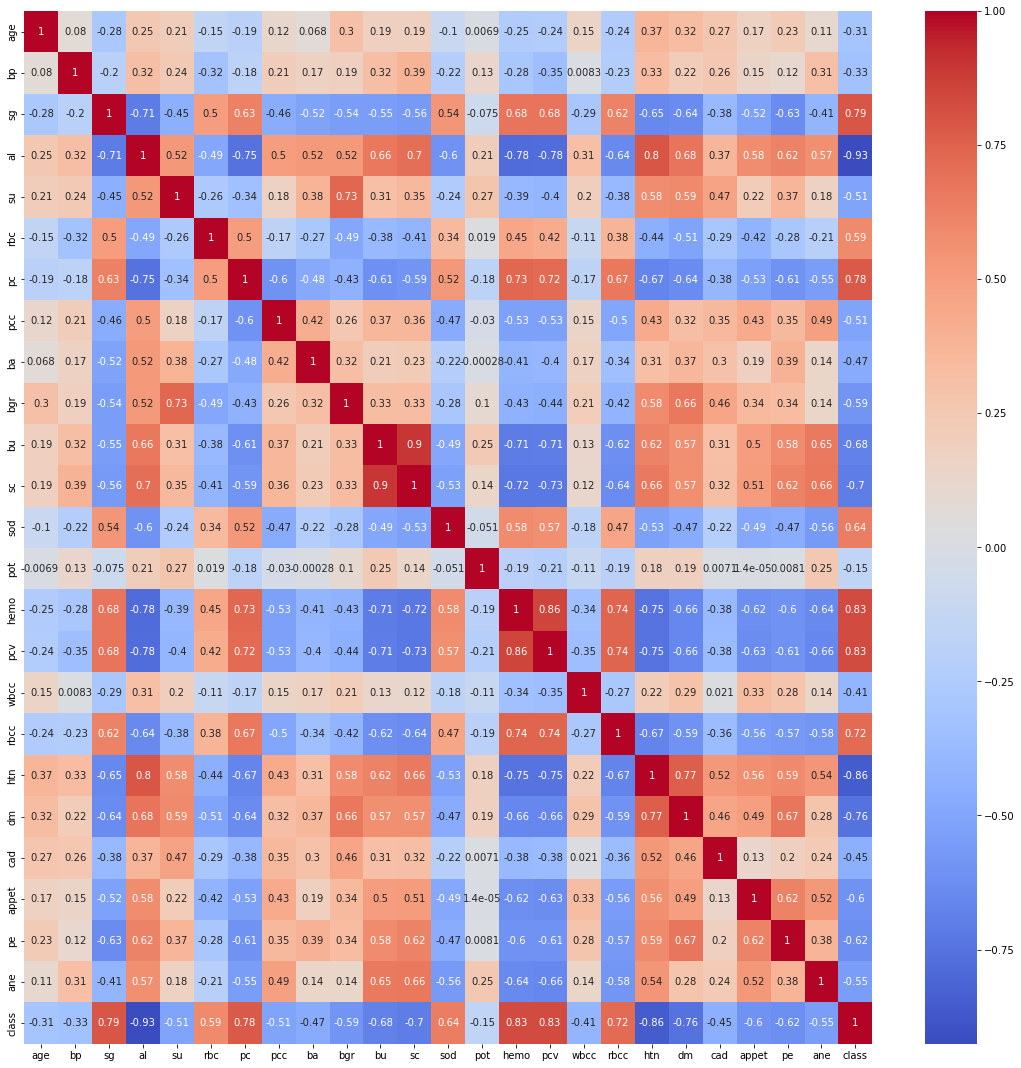

In [24]:
plt.figure(figsize=(19, 19))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')       